# Kmeans Tutorial
Source: 
- http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html
- https://plot.ly/python/dot-plots/
- https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html

## Kmeans using sklearn

In [1]:
# import packages 
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
# get iris dataset 
data = datasets.load_iris()

# get X variables 
features = pd.DataFrame(data.data)

# get Y 
target = pd.DataFrame(data.target)

# get column name 
col_names = data.feature_names

# change column names 
features.columns = col_names

In [3]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [12]:
print(features.shape)
print(target.shape)

(150, 4)
(150, 1)


In [4]:
# init kmeans model 
kmeans = cluster.KMeans(n_clusters=3)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
# fit model
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
print(kmeans.labels_[::10])
#[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
print(target[::10])
#[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]
     0
0    0
10   0
20   0
30   0
40   0
50   1
60   1
70   1
80   1
90   1
100  2
110  2
120  2
130  2
140  2


In [13]:
(pd.Series(kmeans.labels_)).value_counts()

2    62
1    50
0    38
dtype: int64

## Viz through PCA

In [14]:
# reduce to 2-D
reduced_data = PCA(n_components=2).fit_transform(features)
reduced_data[:10]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ]])

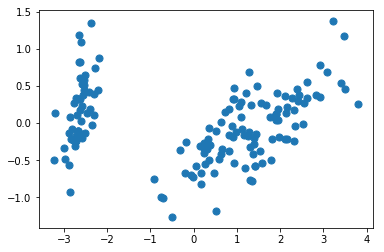

In [36]:
#fig = plt.figure(figsize=(5, 5))
x = reduced_data[:, 0]
y = reduced_data[:, 1]

plt.scatter(x, y,  s=50)#, #cmap='viridis')
plt.show()

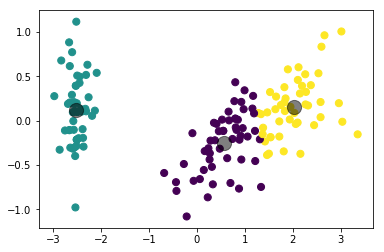

In [16]:
def kmeans_jj(data,k):
    '''
    Reduce the data into 2 dimensions and then perform Kmeans. 
    '''

    reduced_data = PCA(n_components=2).fit_transform(data.iloc[:,1:])

    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    
    centroids = kmeans.cluster_centers_

    x = reduced_data[:, 0]
    y = reduced_data[:, 1]
    
    plt.scatter(x, y, c=kmeans.labels_, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

    plt.show()
    
kmeans_jj(features,k=3)

[(0.0, 0.0, 0.5, 1.0), (0.49019607843137247, 1.0, 0.47754585705249841, 1.0), (0.5, 0.0, 0.0, 1.0)]
0
1
2


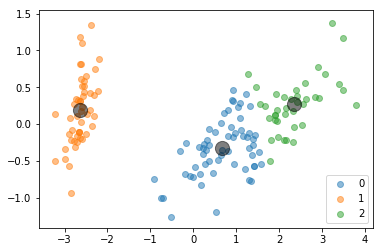

In [3]:
# final 
# https://stackoverflow.com/questions/42056713/matplotlib-scatterplot-with-legend

def kmeans_plot_points(data,k,preprocess=False,remove_first_col=False):
    
    
    if remove_first_col ==True:
        # get rid of first column 
        data = data.iloc[:,1:]
    
    if preprocess ==True:
        data = preprocessing.scale(data,axis=0)
        
    # PCA 
    reduced_data = PCA(n_components=2).fit_transform(data)
    # fit kmeans on the reduced data 
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    centers = kmeans.cluster_centers_
    # extract x and y axis 
    x = reduced_data[:, 0]
    y = reduced_data[:, 1]

    classes = kmeans.labels_# + 1 
    unique = list(set(classes))

    colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
    print(colors)
    for i, u in enumerate(unique):
        print(u)
        xi = [x[j] for j  in range(len(x)) if classes[j] == u]
        yi = [y[j] for j  in range(len(x)) if classes[j] == u]
        plt.scatter(xi, yi, label=str(u),alpha=0.5)
    
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
    plt.legend()
    plt.show()
    
    
kmeans_plot_points(features,k=3,preprocess=False, remove_first_col=False )

## Viz of Cluster Means

In [37]:
# first row = center for first label 
kmeans.cluster_centers_

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [38]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

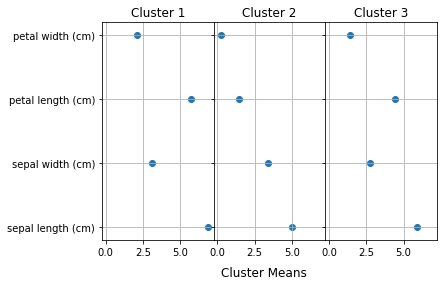

In [48]:
var = features.columns

def kmeans_plot(kmeans, variables): 
    # centroids 
    center = kmeans.cluster_centers_
    # number of clusters 
    k = kmeans.n_clusters
    # for categorical plotting 
    xn = range(len(variables))
    # init plots 
    fig, axes = plt.subplots(1,k, sharey=True, sharex=True)
    # number of plots = number of clusters 
    for i in range(k):
        # scatter plot 
        axes[i].scatter(center[i],xn)
        # Title 
        axes[i].set_title('Cluster ' + str(i+1))
        # Grid 
        axes[i].grid(True)
    # change y-axis name 
    plt.yticks(xn,variables)
    # remove space between subplots 
    plt.subplots_adjust(wspace=0, hspace=0)
    # set common xlabel     
    fig.text(0.5, 0.0, 'Cluster Means', fontsize=12 , ha='center')
    
    plt.show()

kmeans_plot(kmeans = kmeans, variables = var)


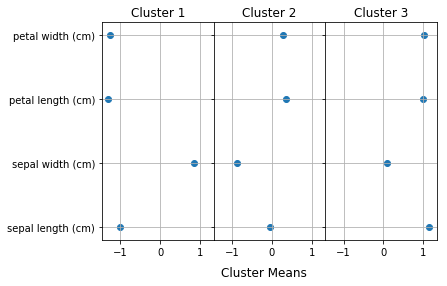

In [52]:
kmeans = cluster.KMeans(n_clusters=3)
# scale data 
kmeans.fit(preprocessing.scale(features))

var = features.columns
kmeans_plot(kmeans = kmeans, variables = var)

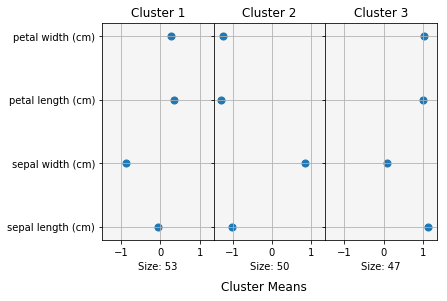

In [14]:
kmeans = cluster.KMeans(n_clusters=3)
# scale data 
kmeans.fit(preprocessing.scale(features))
var = features.columns

def kmeans_plot(kmeans, variables): 
    # centroids 
    center = kmeans.cluster_centers_
    # number of clusters 
    k = kmeans.n_clusters
    # cluster size 
    cluster_size = (pd.Series(kmeans.labels_)).value_counts().sort_index()
    # for categorical plotting 
    xn = range(len(variables))
    # init plots 
    fig, axes = plt.subplots(1,k, sharey=True, sharex=True)
    # number of plots = number of clusters 
    for i in range(k):
        # scatter plot 
        axes[i].scatter(center[i],xn,s=50)
        # Title 
        axes[i].set_title('Cluster ' + str(i+1))
        # 
        axes[i].set_xlabel('Size: ' + str(cluster_size[i]))
        # Grid 
        axes[i].grid(True)
        axes[i].set_facecolor('whitesmoke')
    # change y-axis name 
    plt.yticks(xn,variables)
    # remove space between subplots 
    plt.subplots_adjust(wspace=0, hspace=0)
    # set common xlabel     
    fig.text(0.5, -0.05, 'Cluster Means', fontsize=12, ha='center')
    #fig.set_facecolor("black")

    plt.show()

kmeans_plot(kmeans = kmeans, variables = var)

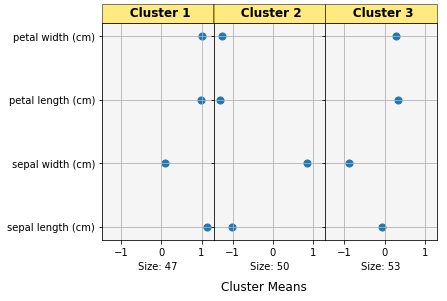

In [30]:
kmeans = cluster.KMeans(n_clusters=3)
# scale data 
kmeans.fit(preprocessing.scale(features))
var = features.columns

def kmeans_plot(kmeans, variables): 
    # centroids 
    center = kmeans.cluster_centers_
    # number of clusters 
    k = kmeans.n_clusters
    # cluster size 
    cluster_size = (pd.Series(kmeans.labels_)).value_counts().sort_index()
    # for categorical plotting 
    xn = range(len(variables))
    # init plots 
    fig, axes = plt.subplots(1,k, sharey=True, sharex=True)
    # number of plots = number of clusters 
    for i in range(k):
        # scatter plot 
        axes[i].scatter(center[i],xn,s=50)
        # Title 
        axes[i].set_title('      Cluster %d     ' % (i+1), fontweight='bold',bbox={'facecolor':'gold', 'alpha':0.5, 'pad':2.9})
        # 
        axes[i].set_xlabel('Size: ' + str(cluster_size[i]))
        # Grid 
        axes[i].grid(True)
        axes[i].set_facecolor('whitesmoke')
    # change y-axis name 
    plt.yticks(xn,variables)
    # remove space between subplots 
    plt.subplots_adjust(wspace=0, hspace=0)
    # set common xlabel     
    fig.text(0.5, -0.05, 'Cluster Means', fontsize=12, ha='center')
    #fig.set_facecolor("black")

    plt.show()

kmeans_plot(kmeans = kmeans, variables = var)

In [ ]:
# final 
def kmeans_plot(data,k): 
    '''
    Visualize cluster means     
    Data is usually the data using aggregator without the first column 
    '''
    # get rid of first column 
    data = data.iloc[:,1:]
    
    # to be y-axis 
    variables = data.columns
    
    # init kmeans model 
    kmeans = cluster.KMeans(n_clusters=k)
    # scale data 
    data = preprocessing.scale(data,axis=0)
    kmeans.fit((data))
    
    # centroids 
    center = kmeans.cluster_centers_
    # number of clusters 
    k = kmeans.n_clusters
    # cluster size 
    cluster_size = (pd.Series(kmeans.labels_)).value_counts().sort_index()
    # for categorical plotting 
    xn = range(len(variables))
    # init plots 
    fig, axes = plt.subplots(1,k, sharey=True, sharex=True,figsize=(7, 5))


    # number of plots = number of clusters 
    for i in range(k):
        # scatter plot 
        axes[i].scatter(center[i],xn,s=50)
        # Title 
        #axes[i].set_title('      Cluster %d     ' % (i+1), fontweight='bold',bbox={'facecolor':'gold', 'alpha':0.5, 'pad':2.9})
        axes[i].set_title('      Cluster %d     ' % (i), fontweight='bold')
        # 
        axes[i].set_xlabel('Size: ' + str(cluster_size[i]))
        # Grid 
        axes[i].grid(True)
        axes[i].set_facecolor('whitesmoke')
    # change y-axis name 
    plt.yticks(xn,variables)
    # remove space between subplots 
    plt.subplots_adjust(wspace=0, hspace=0)
    # set common xlabel     
    fig.text(0.5, -0.05, 'Cluster Means', fontsize=12, ha='center')
    #fig.set_facecolor("black")

    plt.show()
    
    return kmeans 

# Data Aggregation

Useful is the data has too many features 

In [ ]:
def aggregator(data, number_of_splits, method): 
    '''
    split the data array into equal sized buckets 
    and combine them with 'method' like mean or median 
    '''
    # split the volumes, ignore the first column 
    chunks = np.array_split(data.columns[1:], number_of_splits)
    # drop NAs 
    data = data.dropna(axis=0)
    # extract first column or init dataframe; need to change according to your dataset 
    data_combined =  #data['super_link'] #data.loc[:,('super_link')] # data['super_link]
    # get the means for each time chunk 
    for i in range(len(chunks)):
        temp_df = data.loc[:,(chunks[i])]
        temp_df['time_bucket_'+ str(i+1)] = temp_df.apply(method, axis=1)    
        data_combined = pd.concat([data_combined,temp_df['time_bucket_'+ str(i+1)]], axis=1)
    
    print('data_combined.shape: ' + str(data_combined.shape))
    print('data_combined.head: ' + str(data_combined.head(3)))
    
    return data_combined

# example of using aggregator 
#data_combined = aggregator(data_vol, number_of_splits=4, method = np.median)


# Appendeix
Ignore the codes below

In [61]:
cluster_size = (pd.Series(kmeans.labels_)).value_counts().sort_index()
cluster_size

0    50
1    53
2    47
dtype: int64

In [25]:
var = list(features.columns)
var

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
center = kmeans.cluster_centers_
center[0]


array([ 5.006,  3.418,  1.464,  0.244])

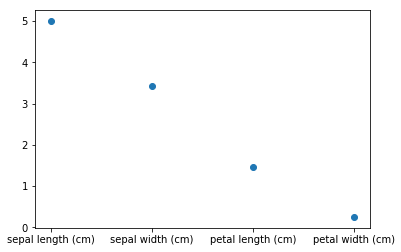

In [40]:
var = ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

xn = range(len(var))
plt.scatter(xn,center[0])
plt.xticks(xn, var) 
plt.show()

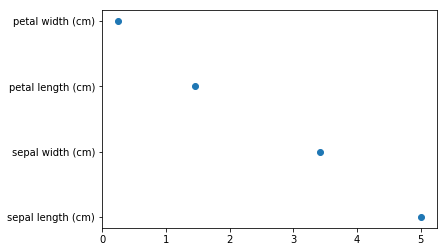

In [46]:
var = ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

xn = range(len(var))
plt.scatter(center[0],xn)
#plt.yticks(var,xn)
plt.yticks(xn,var)
plt.show()

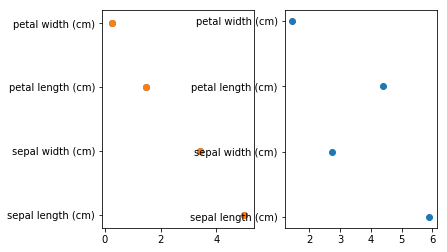

In [72]:
plt.subplot(1, 2, 1)

xn = range(len(var))
plt.scatter(center[0],xn)
plt.yticks(xn,var)

plt.subplot(1, 2, 2)

xn = range(len(var))
plt.scatter(center[1],xn)
plt.yticks(xn,var)

plt.show()

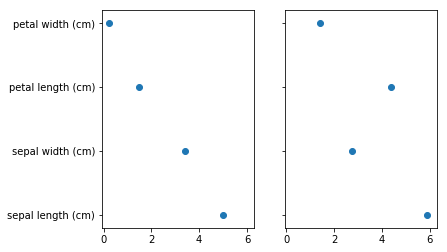

In [78]:
fig, axes = plt.subplots(1,2, sharey=True, sharex=True)

axes[0].scatter(center[0],xn)
#axes[0].yticks(xn,var)

axes[1].scatter(center[1],xn)
#axes[1].yticks(xn,var)

plt.yticks(xn,var)
plt.show()


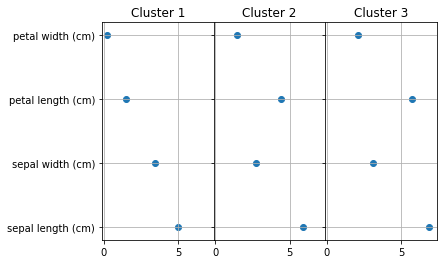

In [90]:
fig, axes = plt.subplots(1,3, sharey=True, sharex=True)

for i in range(3):
    
    axes[i].scatter(center[i],xn)
    axes[i].set_title('Cluster ' + str(i+1))
    axes[i].grid(True)
    
plt.yticks(xn,var)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.grid(True)
plt.show()

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

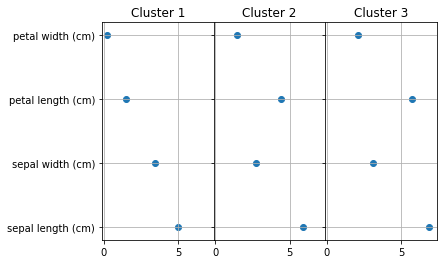

In [93]:
def kmeans_plot(kmeans, variables): 
    
    center = kmeans.cluster_centers_
    k = kmeans.n_clusters
    xn = range(len(variables))
    
    fig, axes = plt.subplots(1,k, sharey=True, sharex=True)

    for i in range(k):

        axes[i].scatter(center[i],xn)
        axes[i].set_title('Cluster ' + str(i+1))
        axes[i].grid(True)

    plt.yticks(xn,variables)
    plt.subplots_adjust(wspace=0, hspace=0)
    #plt.grid(True)
    
    plt.show()

kmeans_plot(kmeans = kmeans, variables = var)
    

In [94]:
np.bincount(kmeans.labels_)

array([50, 62, 38])

In [95]:
pd.Series(kmeans.labels_).value_counts()

1    62
0    50
2    38
dtype: int64

## Kmeans using Numpy

source: http://stamfordresearch.com/k-means-clustering-in-python/